In [1]:
# Import Essential Libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sb

# Setting Seaborn Style
sb.set(style = 'whitegrid')

# For Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# For Preformance metrics
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# Loading Boston Housing Dataset
boston = pd.read_csv('./data/train.csv')
# Top 5 rows of the boston dataset
# boston.head()


In [8]:
# TODO : Let's know how many factors of an individual and Number of Samples
print("The Boston housing Price Prediction Dataset has")
print("\t\tNumber of Factors : \t", boston.shape[1] - 1)
print("\t\tNumber of Samples : \t", boston.shape[0])

The Boston housing Price Prediction Dataset has
		Number of Factors : 	 14
		Number of Samples : 	 333


# Exploratory Data Analysis

In [9]:
boston.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [10]:
boston.isnull().sum()


ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

No null Value in any of the column

In [11]:
boston.dtypes


ID           int64
crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

All are numerical values. So no need of encoding

# Feature Observation


<Figure size 200x200 with 0 Axes>

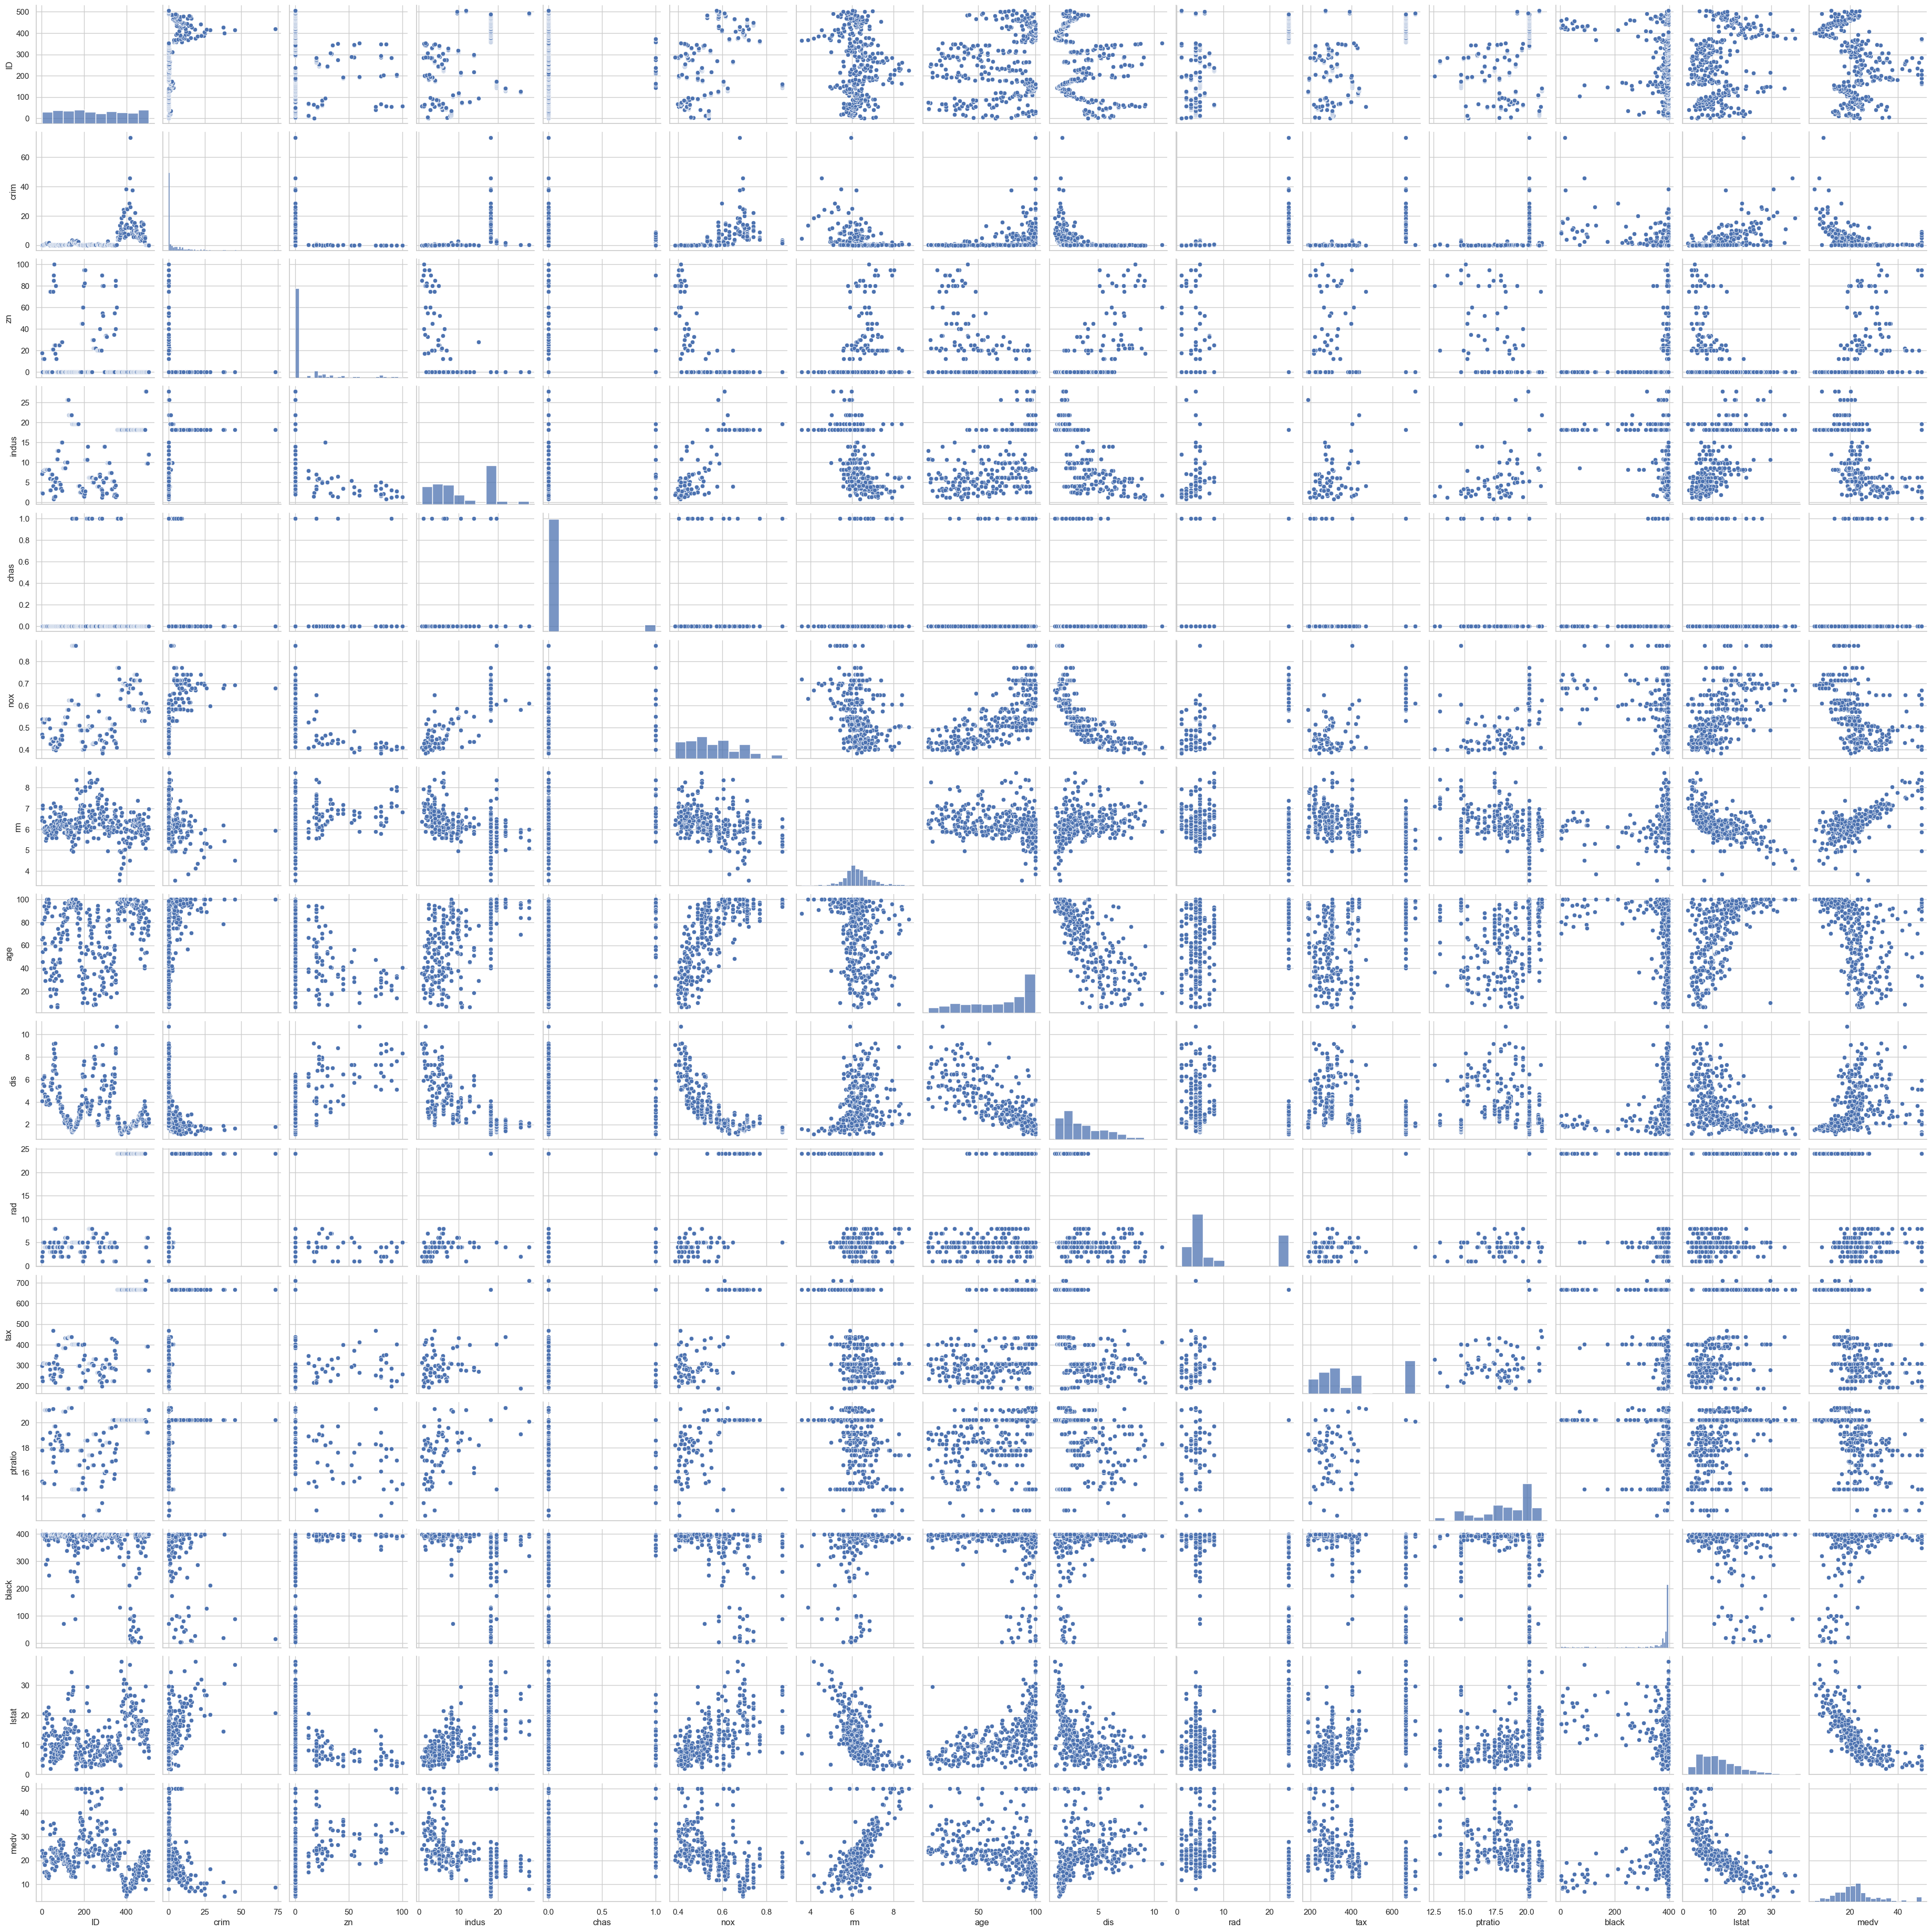

In [13]:
plt.figure(figsize  = (2, 2))
sb.pairplot(boston)
plt.show()

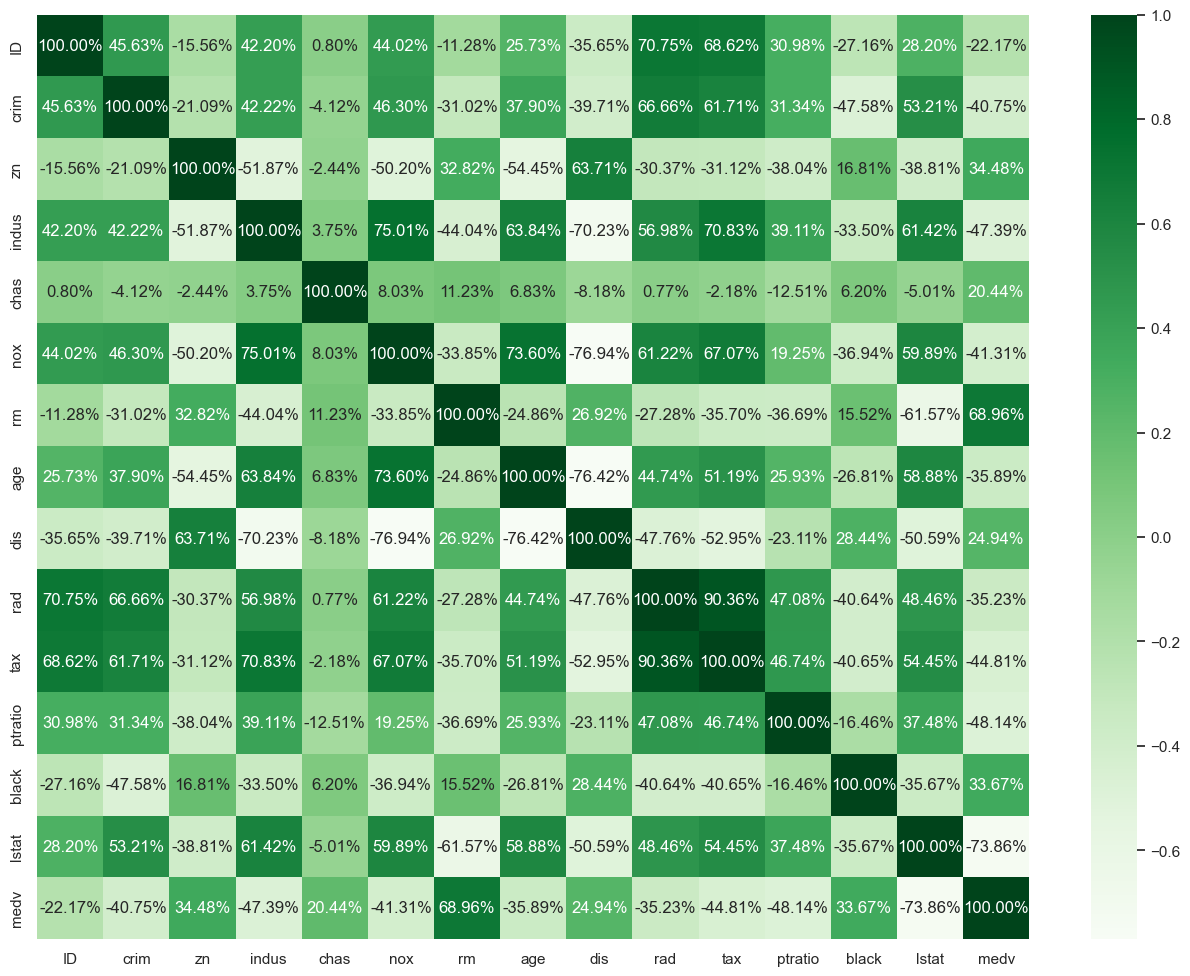

In [15]:
# Visualizing Feature Correlation
plt.figure(figsize = (16, 12))
sb.heatmap(boston.corr(), cmap = 'Greens', annot = True, fmt = '.2%')
plt.show()

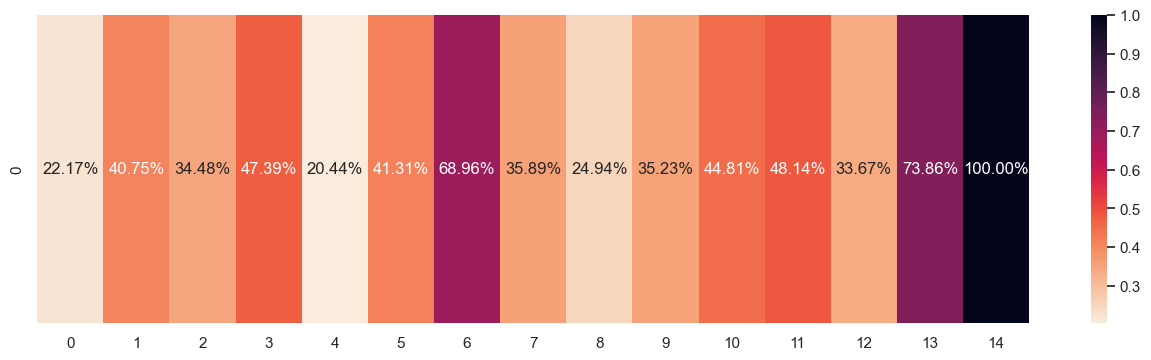

In [31]:
# TODO : Visualizing correlation of features with prediction column `MEDV`

corr_with_medv = boston.corrwith(boston['medv'])

plt.figure(figsize = (16, 4))
sb.heatmap([np.abs(corr_with_medv)], cmap = 'rocket_r', annot = True, fmt = '.2%')
plt.show()


In [18]:
# Observe more at the correlation
corr_with_medv[:-1].abs().sort_values(ascending = False)

lstat      0.738600
rm         0.689598
ptratio    0.481376
indus      0.473932
tax        0.448078
nox        0.413054
crim       0.407454
age        0.358888
rad        0.352251
zn         0.344842
black      0.336660
dis        0.249422
ID         0.221694
chas       0.204390
dtype: float64

In [19]:
# Confirm this by using ExtraTreesRegressor
# Acknowledge the feature Importances
y = boston['medv'].values
from sklearn.ensemble import ExtraTreesRegressor
etc = ExtraTreesRegressor()
etc.fit(boston.iloc[:, :-1].values, y)

print("Percentage Importance of each features with respect to House Price : ")
important_features = pd.Series(etc.feature_importances_*100, index = boston.columns[:-1])
important_features

Percentage Importance of each features with respect to House Price : 


ID          2.842774
crim        4.256577
zn          0.637125
indus       4.319981
chas        1.148738
nox         3.094064
rm         33.382179
age         2.016361
dis         3.726008
rad         1.206816
tax         2.758833
ptratio     4.598907
black       1.794208
lstat      34.217430
dtype: float64

In [20]:
# Feature Impotances by ExtraTressRegressor
important_features.sort_values(ascending = False)

lstat      34.217430
rm         33.382179
ptratio     4.598907
indus       4.319981
crim        4.256577
dis         3.726008
nox         3.094064
ID          2.842774
tax         2.758833
age         2.016361
black       1.794208
rad         1.206816
chas        1.148738
zn          0.637125
dtype: float64

In [21]:
# Feature Impotances by Correlation Matrix
corr_with_medv[:-1].abs().sort_values(ascending = False)

lstat      0.738600
rm         0.689598
ptratio    0.481376
indus      0.473932
tax        0.448078
nox        0.413054
crim       0.407454
age        0.358888
rad        0.352251
zn         0.344842
black      0.336660
dis        0.249422
ID         0.221694
chas       0.204390
dtype: float64

#### It says the same thing essentially.

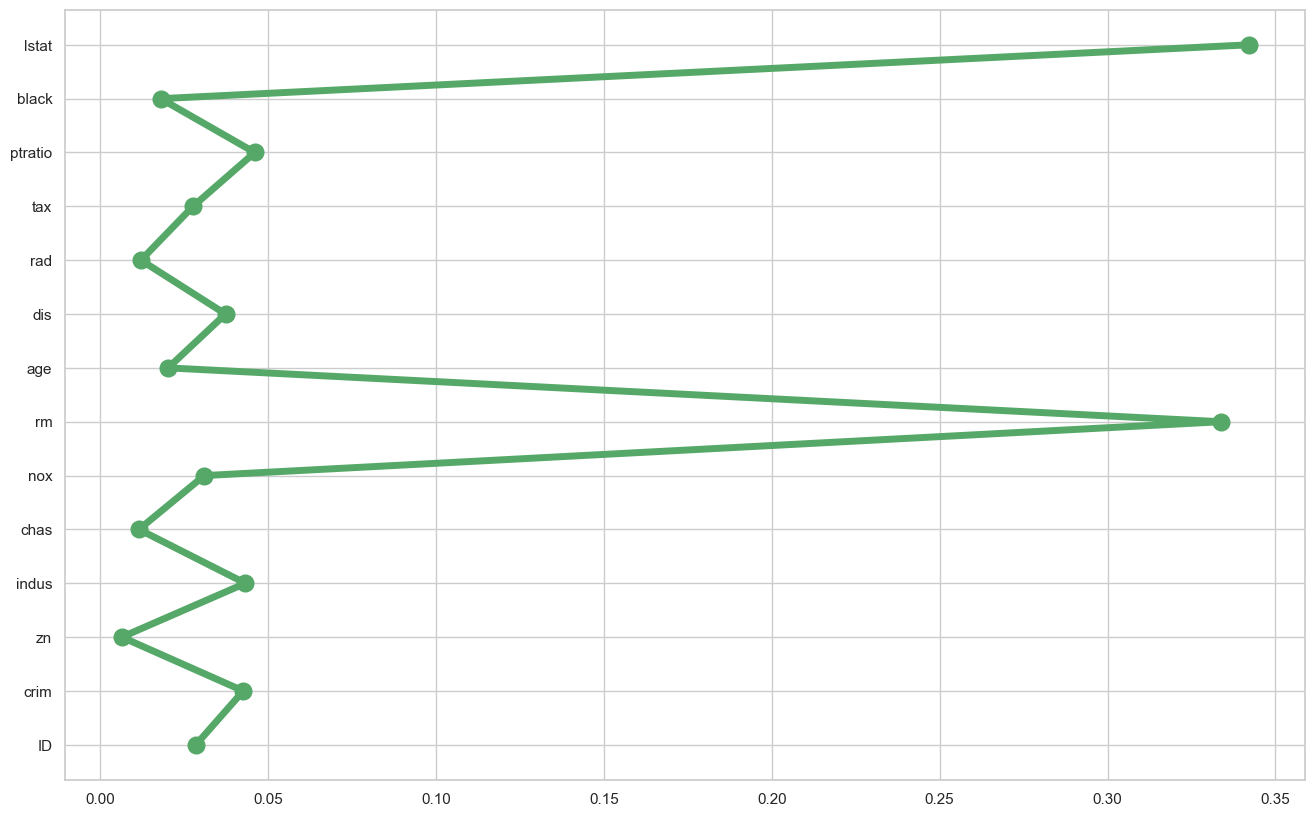

In [22]:
plt.figure(figsize=(16, 10))
plt.plot(etc.feature_importances_, boston.columns[:-1], 'go-', linewidth=5, markersize=12)
plt.show()

Based on the aforementioned feature observations, we discovered that several columns are very important, such as LSTAT and RM.

# Building Machine Learning Model


In [23]:
# Sorting features based on features importance
features_arranged_on_importance = important_features.sort_values(ascending = False).index
features_arranged_on_importance

Index(['lstat', 'rm', 'ptratio', 'indus', 'crim', 'dis', 'nox', 'ID', 'tax',
       'age', 'black', 'rad', 'chas', 'zn'],
      dtype='object')

In [24]:
y = boston.loc[:, 'medv'].values


In [25]:
# Sorting columns based on features importance
new_boston = boston[features_arranged_on_importance]
new_boston.head()

,lstat,rm,ptratio,indus,crim,dis,nox,ID,tax,age,black,rad,chas,zn
0,4.98,6.575,15.3,2.31,0.00632,4.0900,0.538,1,296,65.2,396.90,1,0,18.0
1,9.14,6.421,17.8,7.07,0.02731,4.9671,0.469,2,242,78.9,396.90,2,0,0.0
2,2.94,6.998,18.7,2.18,0.03237,6.0622,0.458,4,222,45.8,394.63,3,0,0.0
3,5.33,7.147,18.7,2.18,0.06905,6.0622,0.458,5,222,54.2,396.90,3,0,0.0
4,12.43,6.012,15.2,7.87,0.08829,5.5605,0.524,7,311,66.6,395.60,5,0,12.5


In [26]:
# Getting boston values
X = new_boston.values
X = X[:, :6]

# TODO : Splitting data as train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

## Linear Regression


In [27]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

print('Training Score : ', linear_model.score(X_train, y_train))
print('Testing Score  : ', linear_model.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, linear_model.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, linear_model.predict(X_test)))

Training Score :  0.6683473116997558
Testing Score  :  0.7339731463240977
R2 Score :  0.7339731463240977
MSE :  23.94198658913869


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

linear_model = make_pipeline(MinMaxScaler(), LinearRegression())
linear_model.fit(X_train, y_train)

print('Training Score : ', linear_model.score(X_train, y_train))
print('Testing Score  : ', linear_model.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, linear_model.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, linear_model.predict(X_test)))

Training Score :  0.6683473116997558
Testing Score  :  0.7339731463240977
R2 Score :  0.7339731463240977
MSE :  23.941986589138693


## Decision Tree Regression


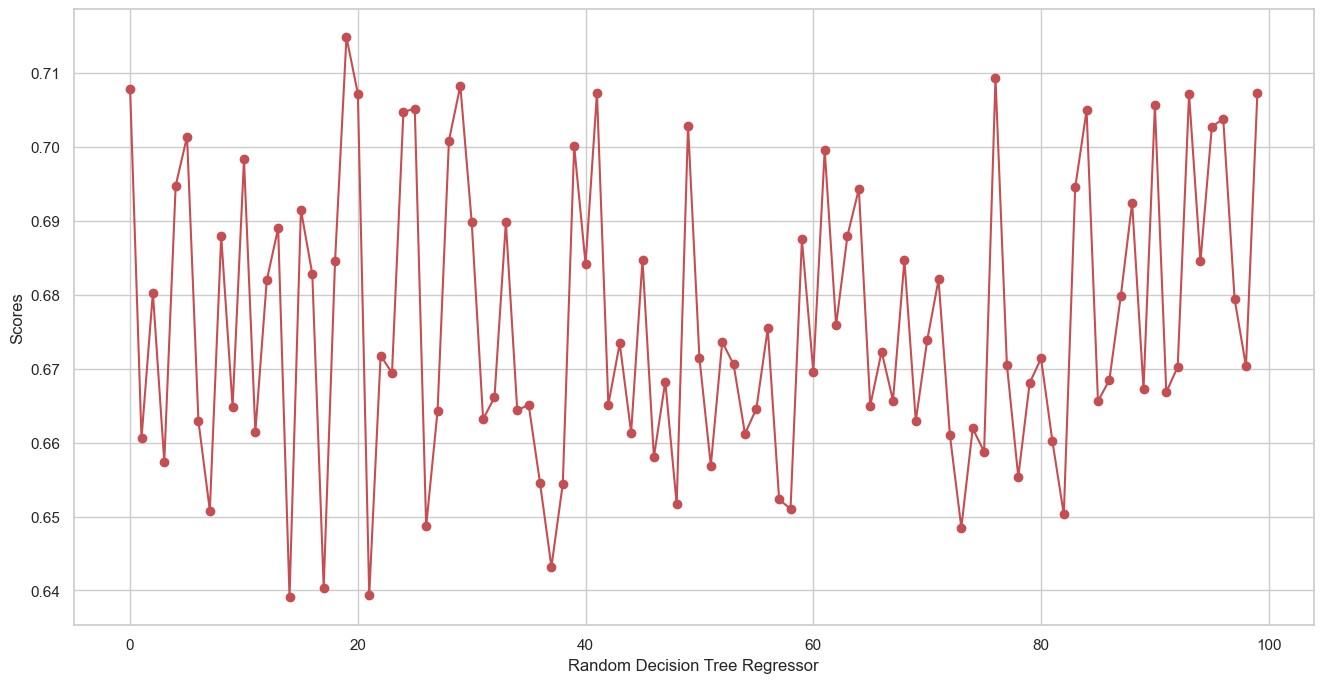

In [33]:
from sklearn.tree import DecisionTreeRegressor
scores = []
for i in range(100):

    dtr_model = DecisionTreeRegressor(max_depth=None, random_state=i)
    dtr_model.fit(X_train, y_train)
    scores.append(r2_score(y_test, dtr_model.predict(X_test)))

plt.figure(figsize = (16, 8))
plt.plot(list(range(100)), scores, 'ro-')
plt.xlabel('Random Decision Tree Regressor')
plt.ylabel('Scores')
plt.show()

#### See how the decision tree score changes for different random states

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

dtr_model = DecisionTreeRegressor(max_depth=23, random_state=3)
dtr_model.fit(X_train[:, :], y_train)
    

print('Training Score : ', dtr_model.score(X_train, y_train))
print('Testing Score  : ', dtr_model.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, dtr_model.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, dtr_model.predict(X_test)))

Training Score :  1.0
Testing Score  :  0.6574018037600438
R2 Score :  0.6574018037600438
MSE :  30.83328358208955


In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
adtr_model = make_pipeline(MinMaxScaler(), DecisionTreeRegressor(max_depth = 12, random_state = 92))
adtr_model.fit(X_train, y_train)

print('Training Score : ', adtr_model.score(X_train, y_train))
print('Testing Score  : ', adtr_model.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, adtr_model.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, adtr_model.predict(X_test)))

Training Score :  0.9974537271959063
Testing Score  :  0.6934456912540061
R2 Score :  0.6934456912540061
MSE :  27.589392000932833


## Random Forest Regression

In [36]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
rfr = RandomForestRegressor(max_depth = 7, random_state = 63)
rfr.fit(X_train, y_train)


print('Training Score : ', rfr.score(X_train, y_train))
print('Testing Score  : ', rfr.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, rfr.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, rfr.predict(X_test)))

Training Score :  0.9668664326563372
Testing Score  :  0.8954134124770652
R2 Score :  0.8954134124770652
MSE :  9.412623730567045


## Other Models Accuracy

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X[:, :], y, test_size = 0.20, random_state = 42)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

print('Linear Regression : ')
model1 = LinearRegression()
model1.fit(X_train, y_train)
print('Score : ', model1.score(X_test, y_test))

print('Decision Tree Regression : ')
model2 = DecisionTreeRegressor(max_depth=23, random_state=3)
model2.fit(X_train, y_train)
print('Score : ', model2.score(X_test, y_test))

print('Random Forest Regression : ')
model3 = RandomForestRegressor(max_depth = 7, random_state = 63)
model3.fit(X_train, y_train)
print('Score : ', model3.score(X_test, y_test))

print('k Neighbors Regression : ')
model4 = KNeighborsRegressor(n_neighbors = 10)
model4.fit(X_train, y_train)
print('Score : ', model4.score(X_test, y_test))

Linear Regression : 
Score :  0.7339731463240977
Decision Tree Regression : 
Score :  0.6574018037600438
Random Forest Regression : 
Score :  0.8954134124770652
k Neighbors Regression : 
Score :  0.67660952868785


## Develop optimal Random Regression Model


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X[:, :], y, test_size = 0.20, random_state = 46)

print('Random Forest Regression : ')
random_forest_regressor = RandomForestRegressor(max_depth = 7, random_state = 63)
random_forest_regressor.fit(X_train, y_train)
print('Score : ', random_forest_regressor.score(X, y))

Random Forest Regression : 
Score :  0.9477519127163115


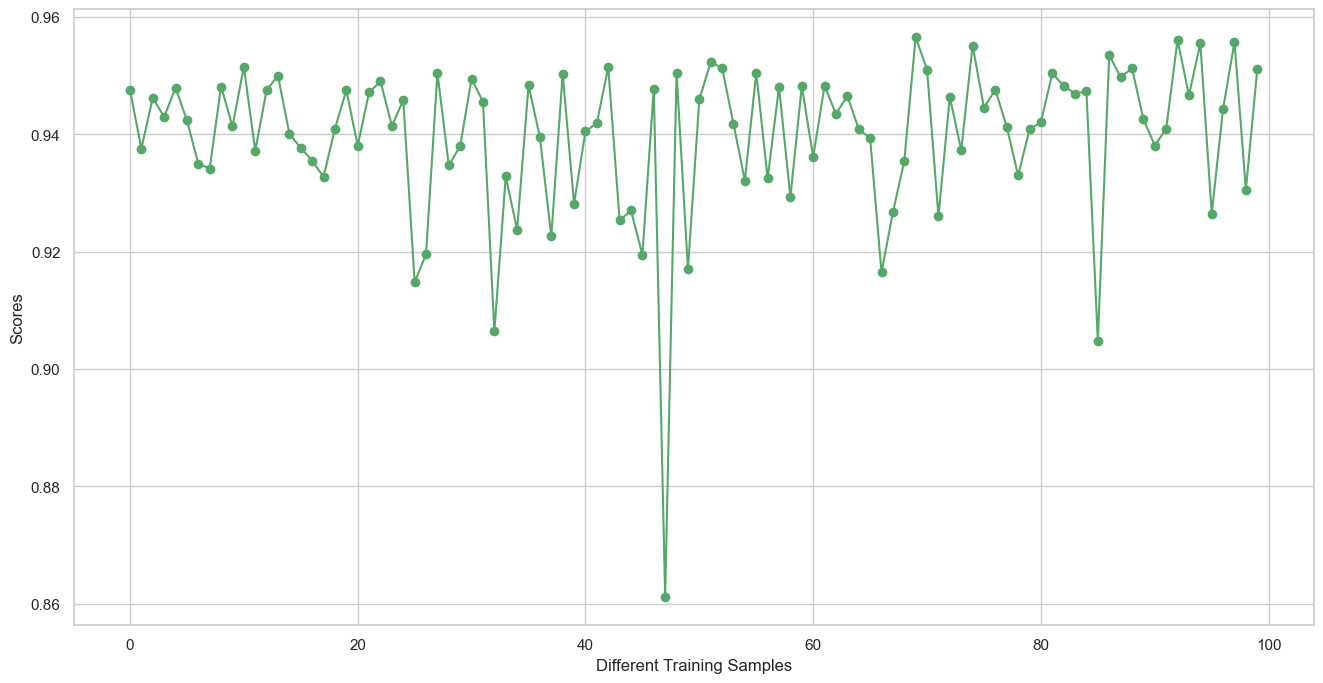

In [39]:
scores = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = i)
    random_forest_regressor = RandomForestRegressor(max_depth = 7, random_state = 63)
    random_forest_regressor.fit(X_train, y_train)
    scores.append(random_forest_regressor.score(X, y))
    
plt.figure(figsize = (16, 8))
plt.plot(list(range(100)), scores, 'go-')
plt.xlabel('Different Training Samples')
plt.ylabel('Scores')
plt.show()

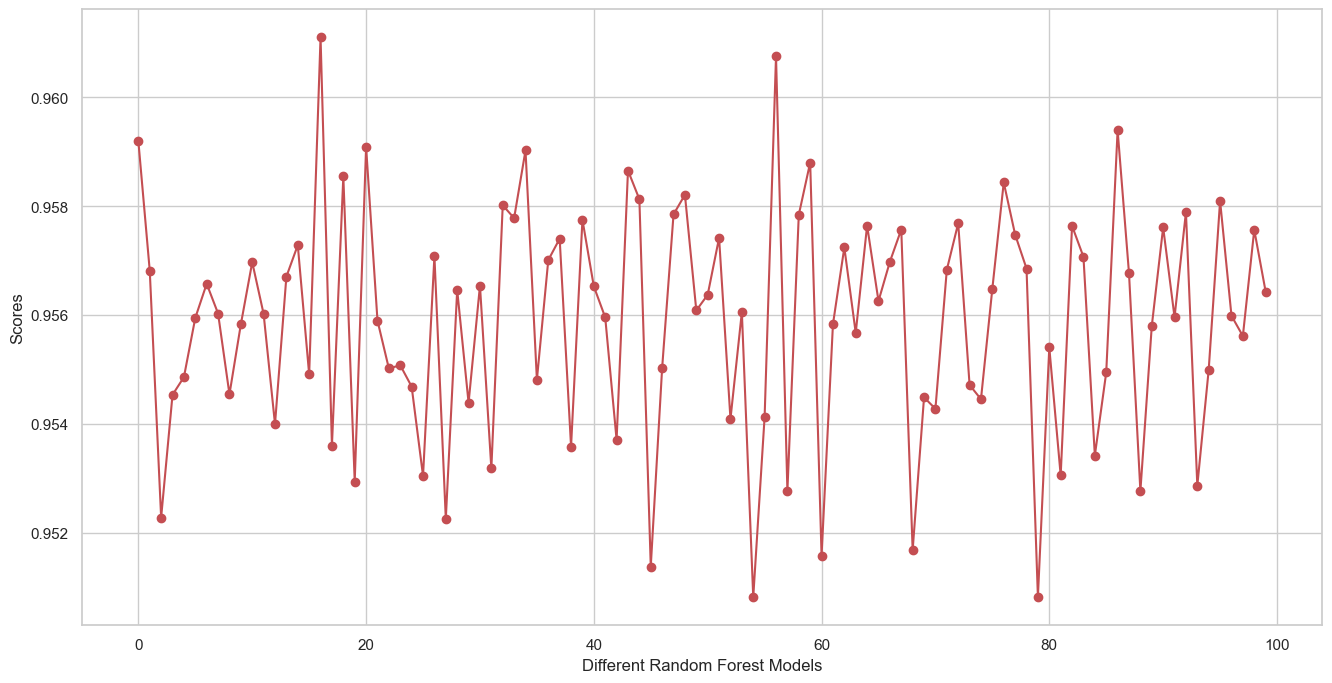

In [41]:
# Scores for different random forest model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 3)

scores = []
for i in range(100):
    random_forest_regressor = RandomForestRegressor(max_depth = 13, random_state = i)
    random_forest_regressor.fit(X_train, y_train)
    scores.append(random_forest_regressor.score(X, y))
    
plt.figure(figsize = (16, 8))
plt.plot(list(range(100)), scores, 'ro-')
plt.xlabel('Different Random Forest Models')
plt.ylabel('Scores')
plt.show()

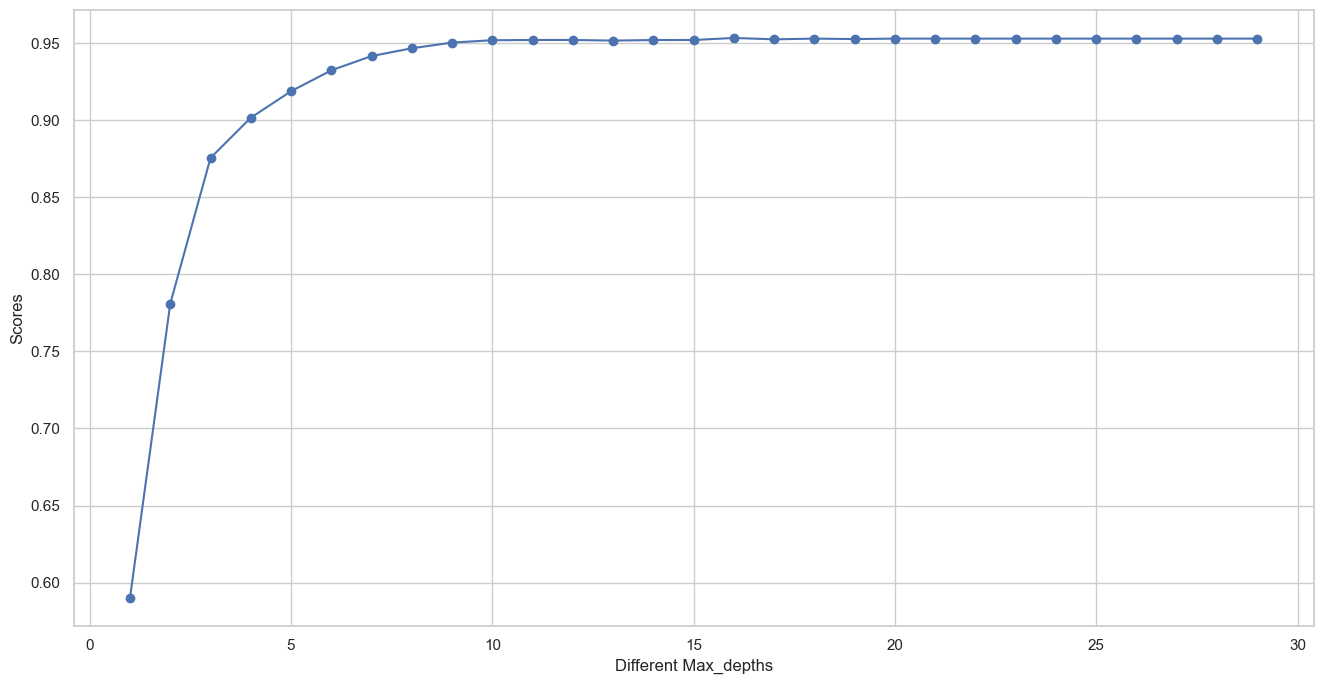

In [44]:
# Scores for different random forest model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 3)

scores = []
for i in range(1, 30):
    random_forest_regressor = RandomForestRegressor(max_depth = i, random_state = 68)
    random_forest_regressor.fit(X_train, y_train)
    scores.append(random_forest_regressor.score(X, y))
    
plt.figure(figsize = (16, 8))
plt.plot(list(range(1, 30)), scores, 'bo-')
plt.xlabel('Different Max_depths')
plt.ylabel('Scores')
plt.show()

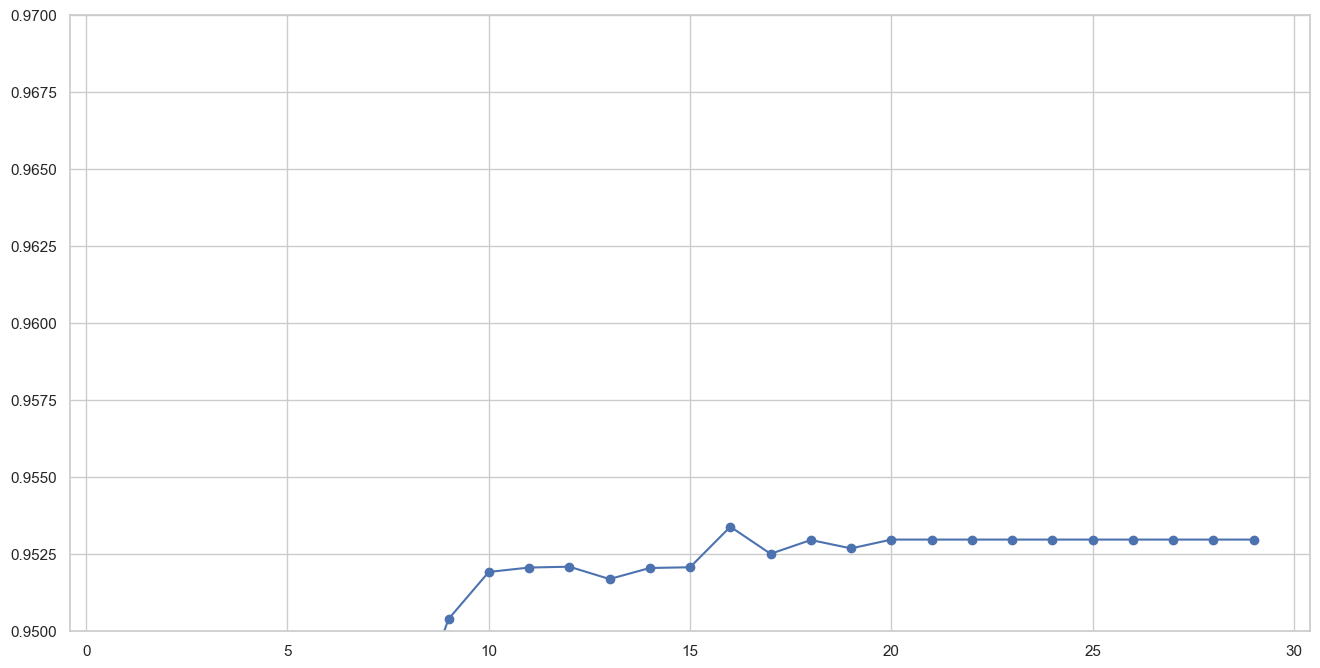

In [43]:
plt.figure(figsize = (16, 8))
plt.plot(list(range(1, 30)), scores, 'bo-')
plt.ylim(0.95, 0.97)
plt.show()

From this, we will pick,

1. random_state = 3, Random Training samples
2. random_state = 68, Random Random forest regressor
3. max_depth = 13, for Max Depths in random forest regressor

# Developing Optimal Model


In [45]:
# Choosing Optimal Training Samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 3)

# Building Optimal Random Forest regressor Model
random_forest_regressor = RandomForestRegressor(max_depth = 13, random_state = 68)
random_forest_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=13, random_state=68)

In [46]:
random_forest_regressor.score(X, y)


0.9516803051501657

In [47]:
print('Training Accuracy : ', random_forest_regressor.score(X_train, y_train))
print('Testing Accuracy  : ', random_forest_regressor.score(X_test, y_test))

Training Accuracy :  0.9810724895837727
Testing Accuracy  :  0.7247786512342773


In [48]:
print('Mean Squared Error : ', mean_squared_error(y_test, random_forest_regressor.predict(X_test)))
print('Root Mean Squared Error : ', mean_squared_error(y_test, random_forest_regressor.predict(X_test))**0.5)
print('Score : ', r2_score(y, random_forest_regressor.predict(X)))

Mean Squared Error :  13.172955772904016
Root Mean Squared Error :  3.6294566773697707
Score :  0.9516803051501657
